In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from time import time
from datetime import timedelta

In [2]:
X = pd.read_csv('USDA-0.2.csv')
y = X['pct_obese_adults13']

drop_cols = ['fips','pct_obese_adults13']
X.drop(drop_cols, axis=1, inplace=True)

In [3]:
cv = KFold(n_splits=5, shuffle=True, random_state=101)

In [4]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100, criterion='mae')

In [5]:
start = time()
oof_preds = cross_val_predict(rf, X, y, cv=cv, method='predict')
end = time()
diff = end - start
td = timedelta(seconds=diff)
print('Completed in {}'.format(td))
mae = mean_absolute_error(y, oof_preds)
print('MAE {:.4f}'.format(mae))
frf = RandomForestRegressor(n_jobs=-1, n_estimators=100, criterion='mae')
start = time()
frf.fit(X,y)
end = time()
diff = end - start
td = timedelta(seconds=diff)
print('Completed in {}'.format(td))

Completed in 0:03:52.660162
MAE 1.8574
Completed in 0:01:10.756029


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

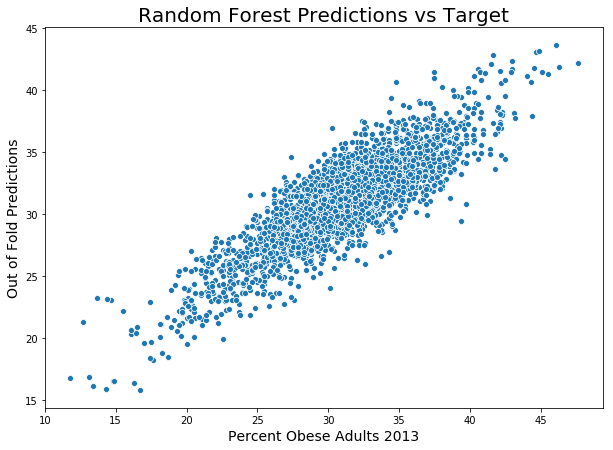

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(y, oof_preds, ax=ax)
ax.set_xlabel('Percent Obese Adults 2013', size=14)
ax.set_ylabel('Out of Fold Predictions', size=14)
ax.set_title('Random Forest Predictions vs Target',size=20)
plt.savefig('rf pred vs target with diab',dpe=300)
plt.show()

In [8]:
errors = abs(y - oof_preds)

In [9]:
errors.name = 'Absolute Error'

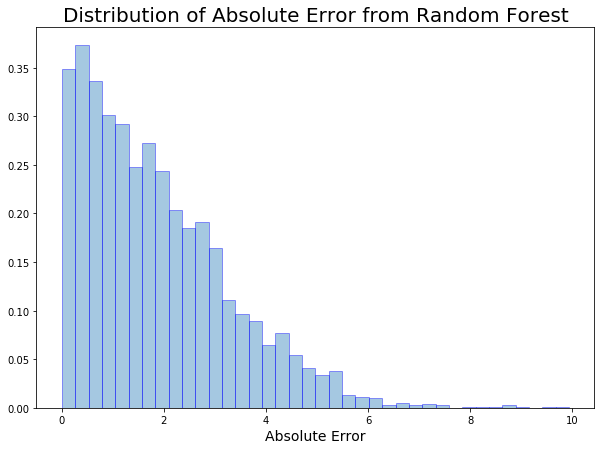

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

sns.distplot(errors, norm_hist=True, kde=False,hist_kws=dict(edgecolor='b'), ax=ax)
ax.set_title('Distribution of Absolute Error from Random Forest',size=20)
ax.set_xlabel('Absolute Error', size=14)
plt.savefig('dist_abs_error_diab', dpi=300)
plt.show()

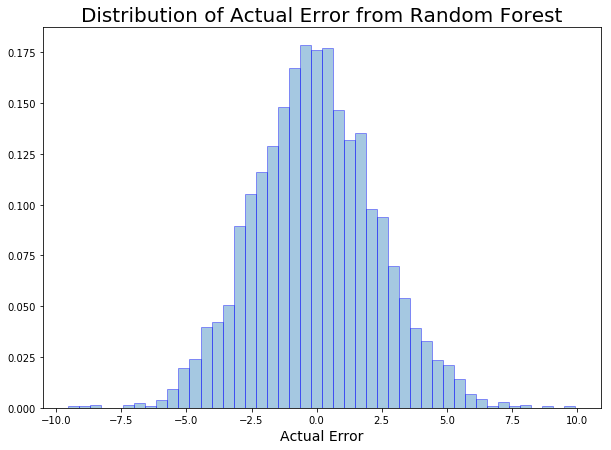

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
actual_error = y - oof_preds
sns.distplot(actual_error, norm_hist=True, kde=False,hist_kws=dict(edgecolor='b'), ax=ax)
ax.set_title('Distribution of Actual Error from Random Forest',size=20)
ax.set_xlabel('Actual Error', size=14)
plt.savefig('dist_actual_error_diab', dpi=300)
plt.show()

In [12]:
feat_imp = pd.DataFrame([(i,j) for i,j in zip(X.columns,frf.feature_importances_)],columns=['Feature','Importance'])
feat_imp.sort_values(by='Importance',ascending=False).head(10)

,Feature,Importance
190,pct_diabetes_adults13,0.169843
98,pc_fsrsales07,0.057606
99,pc_fsrsales12,0.055950
189,pct_diabetes_adults08,0.024755
130,pct_sfsp15,0.021052
203,pct_65older10,0.019664
122,pct_free_lunch09,0.015541
93,fsrpth09,0.012581
197,pct_nhwhite10,0.011209
94,fsrpth14,0.010859


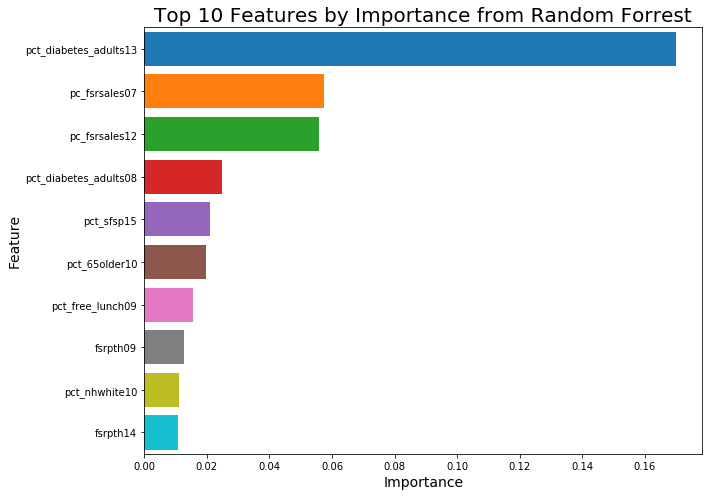

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='Importance', y='Feature', 
            data=feat_imp.sort_values(by='Importance', ascending=False).head(10),
           ax=ax, saturation=1.0)
ax.set_title('Top 10 Features by Importance from Random Forrest', size=20)
ax.set_ylabel('Feature', size=14)
ax.set_xlabel('Importance', size=14)
plt.tight_layout()
plt.savefig('Top 10 Features by Importance from Random Forrest with diab', dpi=300)
plt.show()

In [14]:
variable_data = pd.read_excel('DataDownload.xls',sheet_name='Variable List')
top_feats = [i.upper() for i in feat_imp.sort_values(by='Importance', ascending=False)['Feature'].tolist()][0:10]

In [15]:
variable_data[variable_data['Variable Code'].isin(top_feats)]

,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
86,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants/1,000 pop, 2009",FSRPTH09,CNTY10,Count
87,Restaurant Availability and Expenditures,RESTAURANTS,Full-service,"Full-service restaurants/1,000 pop, 2014",FSRPTH14,CNTY10,Count
91,Restaurant Availability and Expenditures,RESTAURANTS,Expenditures,"Expenditures per capita, restaurants, 2007*",PC_FSRSALES07,CNTY10,Dollars
92,Restaurant Availability and Expenditures,RESTAURANTS,Expenditures,"Expenditures per capita, restaurants, 2012*",PC_FSRSALES12,CNTY10,Dollars
115,Food Assistance,ASSISTANCE,National School Lunch Program,"Students eligible for free lunch (%), 2009",PCT_FREE_LUNCH09,CNTY10,Percent
123,Food Assistance,ASSISTANCE,Summer Food Service Program,Summer Food Service Program participants (% po...,PCT_SFSP15,CNTY10,Percent
251,Health and Physical Activity,HEALTH,Health,"Adult diabetes rate, 2008",PCT_DIABETES_ADULTS08,CNTY10,Percent
252,Health and Physical Activity,HEALTH,Health,"Adult diabetes rate, 2013",PCT_DIABETES_ADULTS13,CNTY10,Percent
262,Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,"% White, 2010",PCT_NHWHITE10,CNTY10,Percent
268,Socioeconomic Characteristics,SOCIOECONOMIC,Race & Age,"% Population 65 years or older, 2010",PCT_65OLDER10,CNTY10,Percent


In [16]:
top_feats_lower = [i.lower() for i in top_feats]
top_feats_lower

['pct_diabetes_adults13',
 'pc_fsrsales07',
 'pc_fsrsales12',
 'pct_diabetes_adults08',
 'pct_sfsp15',
 'pct_65older10',
 'pct_free_lunch09',
 'fsrpth09',
 'pct_nhwhite10',
 'fsrpth14']

In [17]:
top_data = X[top_feats_lower].join(y)

In [18]:
def scatter(x, y, data, save=None):
    fig, ax = plt.subplots(figsize=(10,7))
    title = '{} vs {}'.format(y,x)
    sns.scatterplot(x, y, data=data, ax=ax)
    ax.set_xlabel(x, size=14)
    ax.set_ylabel(y, size=14)
    ax.set_title(title,size=20)
    if save:
        plt.savefig(title.format(),dpe=300)
    plt.show()

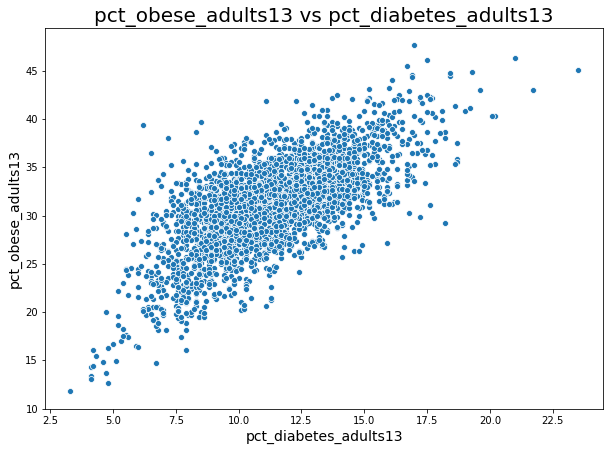

In [20]:
scatter(y=y.name, x='pct_diabetes_adults13', data=top_data)

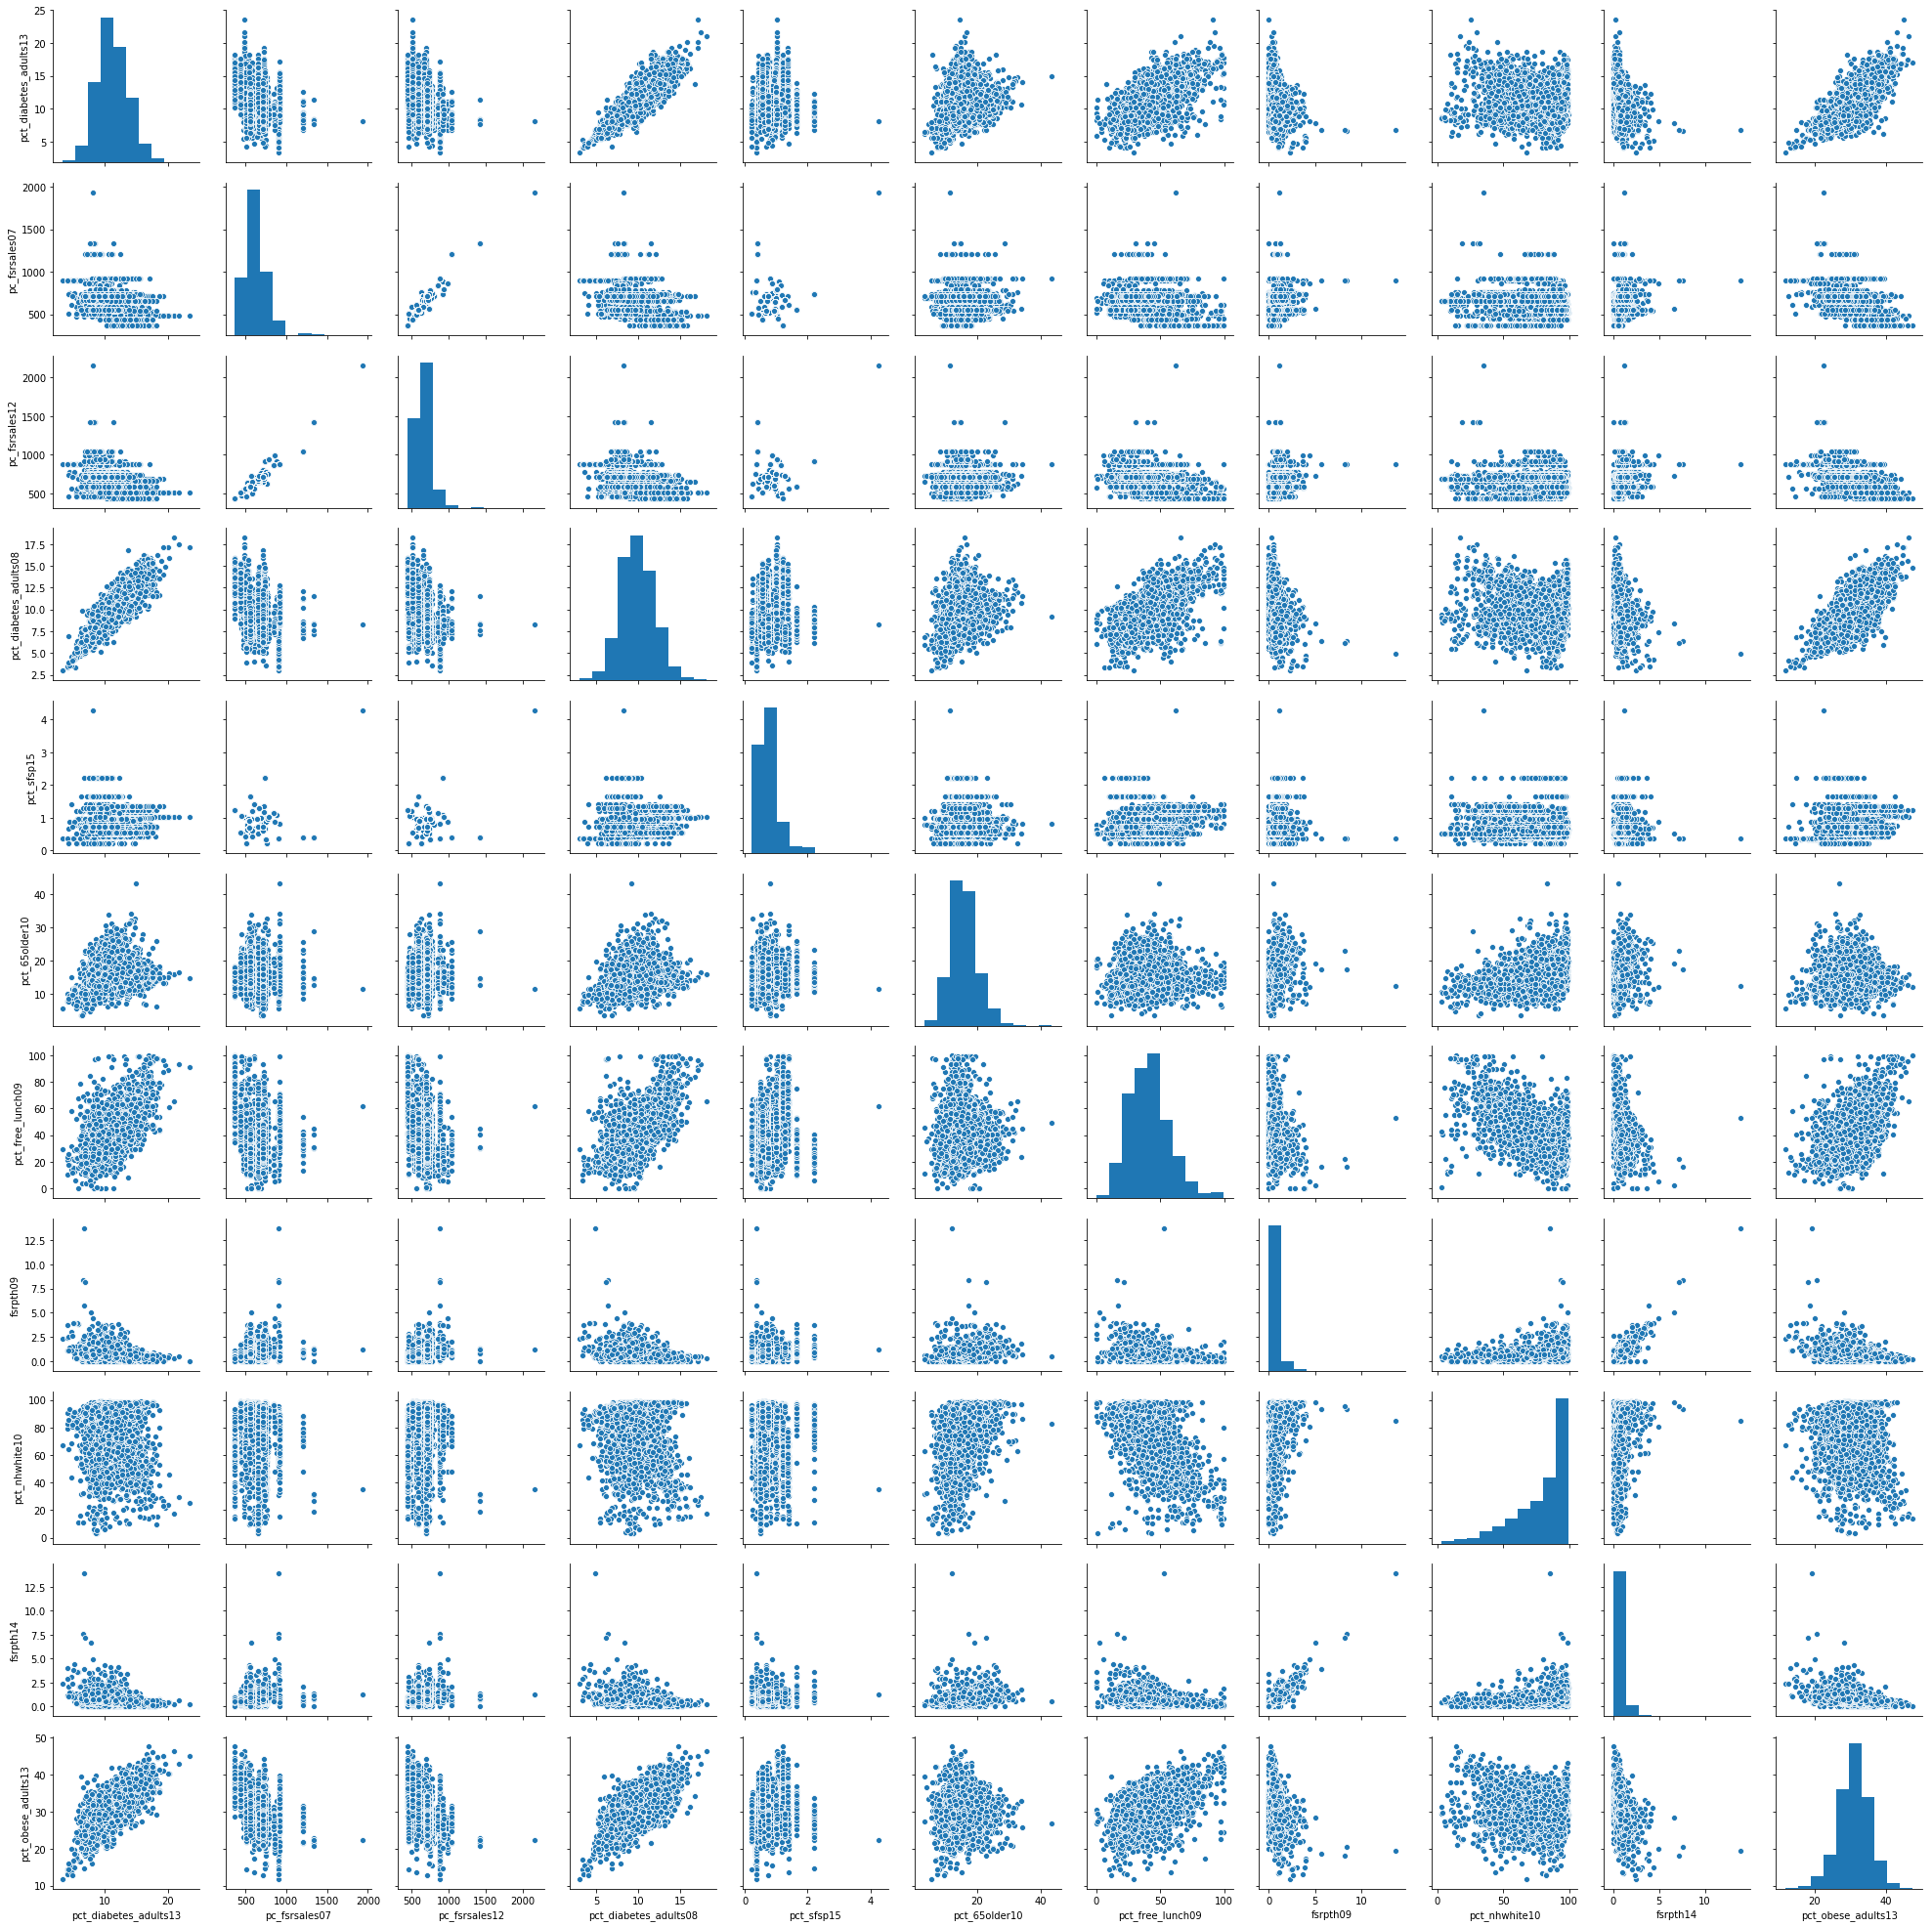

In [21]:
sns.pairplot(top_data)

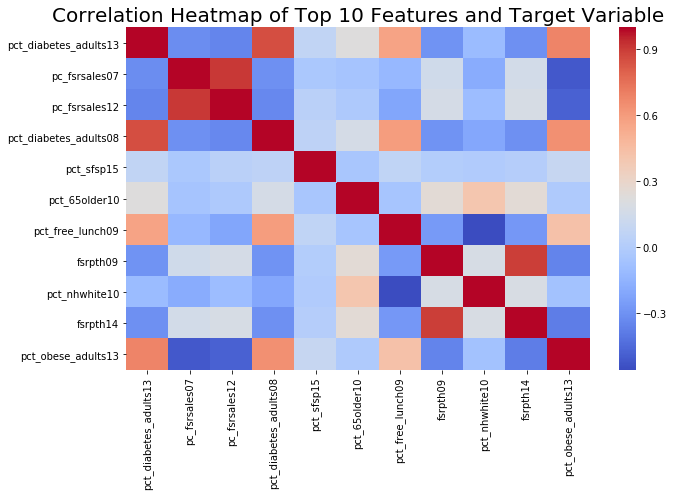

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(top_data.corr(), ax=ax, cmap="coolwarm")
ax.set_title('Correlation Heatmap of Top 10 Features and Target Variable',size=20)
plt.tight_layout()
plt.savefig('Correlation Heat Map with diab', dpi=300)
plt.show()